In [2]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
df = pd.read_csv('Feline UTI Data.csv')
pd.options.display.max_columns = None
df

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,Lipid Layer,WBC,Pyuria,RBC,Crystals,Epithelial cells transitional,Epithelial cells squamous,Epithelial cells renal,Epithealial cells caudate,Casts hyaline,Cast granular,Cast waxy,Cast cellular,Sed Bac Quantity,Sed Bac Type
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,Not Present,0,0,2,0,2,0,0,0,0,0,0,0,0,0
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,Not Present,2,0,0,0,1,1,0,0,0,0,0,0,0,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,Not Present,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,Negative,3,0,5,1,1,1,0,0,1,0,0,0,0,0
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,Pos,3,0,8,0,1,1,0,0,1,0,0,0,0,0
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,Floc,3,0,8,0,2,2,0,0,0,0,0,0,0,0
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,Floc,3,0,5,0,1,1,0,0,0,0,0,0,2,1


In [3]:
from pycaret.classification import * 

In [4]:
data = pd.read_csv('Feline UTI Data_limited.csv')
pd.options.display.max_columns = None
data

,Visit Number,Positive culture,sex,Age,BW,Color,Clarity,USG,ph,Protein,Glucose,Ketones,Bilirubin,Hemoprotein,Lipid Layer,WBC,RBC
0,3870BO,0,4,13.2,7.5,Yellow,Hazy,1.035,6,75,0,0,0,0,Not Present,0,0
1,50690EM,0,2,9.3,5.4,Yellow,Clear,1.013,6,75,1000,150,0,25,Not Present,0,2
2,3999BO,0,4,16.4,5.5,Straw,Hazy,1.031,6,0,1000,0,0,0,Not Present,0,0
3,50719EM,0,4,21.4,3.5,Straw,Sl Hazy,1.011,6,25,50,0,0,150,Not Present,2,0
4,4316BO,0,4,5.4,6.0,Yellow,Hazy,1.059,6,25,0,0,0,0,Not Present,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,944DM,0,4,18.0,NaN,Yellow,SLHazy,1.008,6,15,0,0,0,150,Negative,3,5
4048,1033DM,0,4,7.8,2.7,Straw,Clear,1.016,6,100,0,0,0,50,Pos,3,8
4049,1052DM,0,4,11.2,3.9,Yellow,Cloudy,1.052,7,100,0,0,0,25,Floc,3,8
4050,1071DM,1,2,1.3,5.0,Yellow,Hazy,1.036,7,30,0,0,0,0,Floc,3,5


In [7]:
exp1_clf = setup(data, target='Positive culture', fix_imbalance = True, numeric_features = ['Protein' , 'Glucose', 'Ketones' , 'Hemoprotein', 'Bilirubin', 'WBC','RBC'], ignore_features =['Visit Number', 'BW'])

,Description,Value
0,Session id,6732
1,Target,Positive culture
2,Target type,Binary
3,Original data shape,"(4052, 17)"
4,Transformed data shape,"(5850, 34)"
5,Transformed train set shape,"(4634, 34)"
6,Transformed test set shape,"(1216, 34)"
7,Ignore features,2
8,Numeric features,7
9,Categorical features,4


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8769,0.7772,0.4741,0.7609,0.5814,0.5146,0.5356,0.1660
rf,Random Forest Classifier,0.8505,0.7558,0.4856,0.6613,0.5472,0.4622,0.4768,0.1690
lda,Linear Discriminant Analysis,0.8272,0.7758,0.5589,0.5305,0.5410,0.4355,0.4377,0.1110
ridge,Ridge Classifier,0.8258,0.0000,0.5647,0.5267,0.5413,0.4348,0.4375,0.1020
lr,Logistic Regression,0.8212,0.7864,0.5974,0.5109,0.5497,0.4393,0.4421,0.3830
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1100
knn,K Neighbors Classifier,0.7532,0.7305,0.5992,0.3877,0.4701,0.3189,0.3323,0.1110
svm,SVM - Linear Kernel,0.6932,0.0000,0.6862,0.3692,0.4646,0.2956,0.3269,0.1020
lightgbm,Light Gradient Boosting Machine,0.3626,0.6007,0.8035,0.1987,0.3128,0.0335,0.0670,0.1810
dt,Decision Tree Classifier,0.3492,0.5402,0.8416,0.2128,0.3314,0.0538,0.0664,0.1080


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [9]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6732, verbose=0, warm_start=False)


In [10]:
et2 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8521,0.6995,0.3269,0.7083,0.4474,0.3751,0.4126
1,0.8768,0.7599,0.4808,0.7576,0.5882,0.5200,0.5386
2,0.9155,0.8541,0.6346,0.8684,0.7333,0.6846,0.6965
3,0.8803,0.8348,0.5385,0.7368,0.6222,0.5531,0.5627
4,0.8697,0.7655,0.4615,0.7273,0.5647,0.4926,0.5102
5,0.8732,0.7767,0.4615,0.7500,0.5714,0.5019,0.5223
6,0.8905,0.7801,0.5294,0.7941,0.6353,0.5739,0.5902
7,0.8799,0.7448,0.4808,0.7812,0.5952,0.5293,0.5509
8,0.8516,0.7502,0.3077,0.7273,0.4324,0.3628,0.4075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
tuned_et2=tune_model(et2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8662,0.7313,0.3846,0.7692,0.5128,0.4451,0.4811
1,0.8944,0.8335,0.5577,0.8056,0.6591,0.5990,0.6132
2,0.9085,0.8433,0.6346,0.8250,0.7174,0.6639,0.6720
3,0.8768,0.8497,0.5192,0.7297,0.6067,0.5361,0.5470
4,0.8662,0.7933,0.4615,0.7059,0.5581,0.4833,0.4985
5,0.8627,0.8236,0.4423,0.6970,0.5412,0.4651,0.4818
6,0.8905,0.8100,0.5490,0.7778,0.6437,0.5812,0.5935
7,0.8834,0.7787,0.5192,0.7714,0.6207,0.5549,0.5701
8,0.8587,0.7327,0.3654,0.7308,0.4872,0.4156,0.4493


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


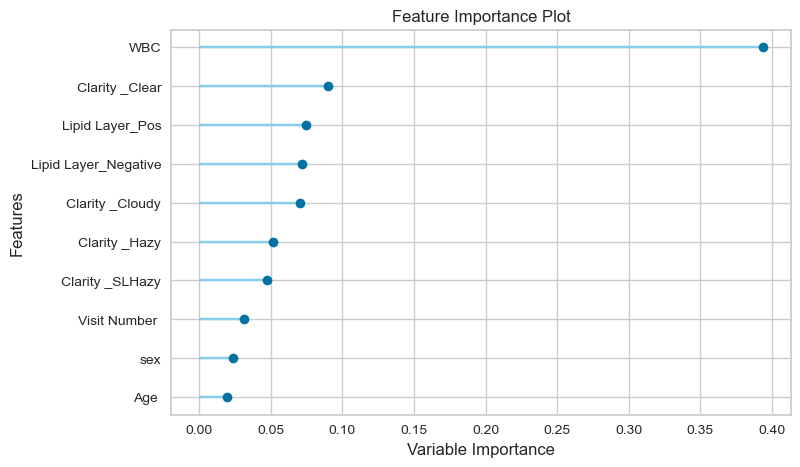

In [12]:
plot_model(tuned_et2, plot = 'feature')

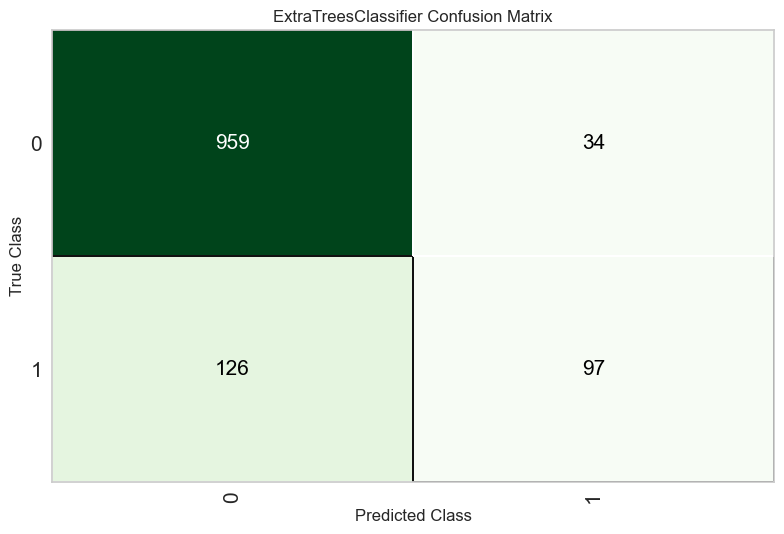

In [13]:
plot_model(tuned_et2 , plot = 'confusion_matrix')

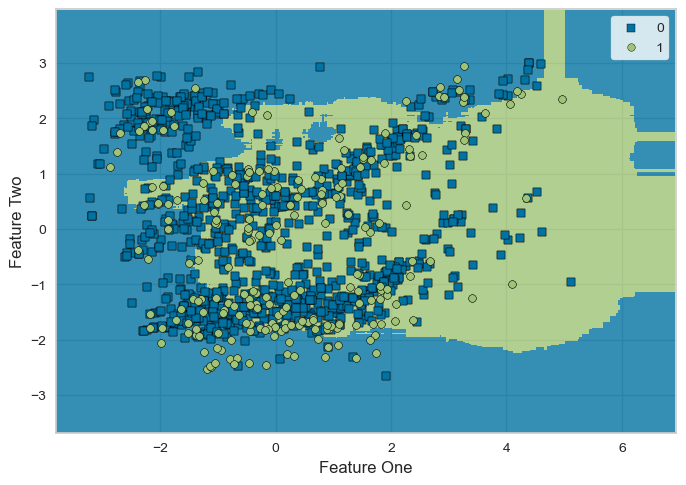

In [14]:
plot_model(tuned_et2 , plot = 'boundary', use_train_data = True)

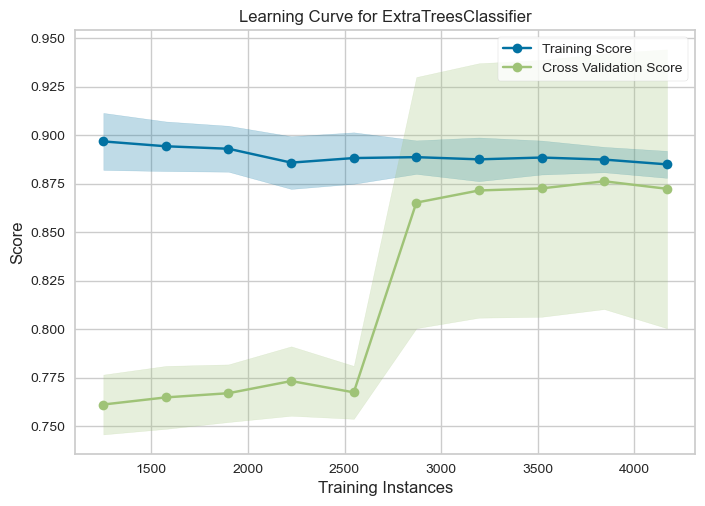

In [15]:
plot_model(tuned_et2, plot = 'learning', use_train_data = True)

In [17]:
data2 = pd.read_csv('sb_compare.csv')
pd.options.display.max_columns = None
data2

,Visit Number,Positive culture,Sed Bac Quantity,Sed Bac Type
0,3870BO,0,0,0
1,50690EM,0,0,0
2,3999BO,0,0,0
3,50719EM,0,0,0
4,4316BO,0,0,0
...,...,...,...,...
4047,944DM,0,0,0
4048,1033DM,0,0,0
4049,1052DM,0,0,0
4050,1071DM,1,2,1


In [19]:
exp1_clf = setup(data, target='Positive culture', fix_imbalance = True, numeric_features = [], ignore_features =['Visit Number', 'BW'])

,Description,Value
0,Session id,4268
1,Target,Positive culture
2,Target type,Binary
3,Original data shape,"(4052, 17)"
4,Transformed data shape,"(5850, 32)"
5,Transformed train set shape,"(4634, 32)"
6,Transformed test set shape,"(1216, 32)"
7,Ignore features,2
8,Numeric features,11
9,Categorical features,4


In [20]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8741,0.7820,0.4507,0.7647,0.5649,0.4974,0.5223,0.1800
lda,Linear Discriminant Analysis,0.8255,0.7882,0.5663,0.5242,0.5414,0.4344,0.4368,0.1260
rf,Random Forest Classifier,0.8244,0.7273,0.4547,0.5524,0.4826,0.3810,0.3917,0.1880
ridge,Ridge Classifier,0.8205,0.0000,0.5663,0.5134,0.5343,0.4244,0.4278,0.1160
dummy,Dummy Classifier,0.8170,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1230
lr,Logistic Regression,0.8149,0.7919,0.6068,0.4959,0.5441,0.4298,0.4344,0.1700
knn,K Neighbors Classifier,0.7271,0.7273,0.5896,0.3565,0.4432,0.2779,0.2935,0.1220
svm,SVM - Linear Kernel,0.6589,0.0000,0.6919,0.3982,0.4596,0.2834,0.3196,0.1180
dt,Decision Tree Classifier,0.3696,0.4840,0.6646,0.1779,0.2789,-0.0126,-0.0355,0.1200
lightgbm,Light Gradient Boosting Machine,0.3455,0.6125,0.7652,0.1826,0.2809,0.0063,0.0172,0.1400


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [21]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4268, verbose=0, warm_start=False)


In [22]:
et3 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8873,0.7776,0.5192,0.7941,0.6279,0.5649,0.5826
1,0.8908,0.8206,0.5577,0.7838,0.6517,0.5891,0.6011
2,0.8627,0.7726,0.3846,0.7407,0.5063,0.4357,0.4674
3,0.8979,0.7998,0.5577,0.8286,0.6667,0.6091,0.6257
4,0.8697,0.7943,0.4038,0.7778,0.5316,0.4646,0.4984
5,0.9155,0.8408,0.5962,0.9118,0.7209,0.6737,0.6948
6,0.8410,0.7503,0.2941,0.6250,0.4000,0.3218,0.3523
7,0.8445,0.7576,0.3654,0.6333,0.4634,0.3801,0.3998
8,0.8657,0.7641,0.4808,0.6944,0.5682,0.4918,0.5034


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
tuned_et3 = tune_model(et3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8908,0.7987,0.5192,0.8182,0.6353,0.5749,0.5954
1,0.9014,0.8077,0.6346,0.7857,0.7021,0.6439,0.6491
2,0.8873,0.8375,0.5769,0.7500,0.6522,0.5863,0.5935
3,0.8838,0.8003,0.5769,0.7317,0.6452,0.5768,0.5827
4,0.8662,0.8278,0.5577,0.6591,0.6042,0.5243,0.5270
5,0.8944,0.8579,0.6346,0.7500,0.6875,0.6245,0.6276
6,0.8410,0.7543,0.4706,0.5714,0.5161,0.4221,0.4249
7,0.8657,0.7472,0.4231,0.7333,0.5366,0.4646,0.4887
8,0.8481,0.7878,0.4808,0.6098,0.5376,0.4482,0.4528


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


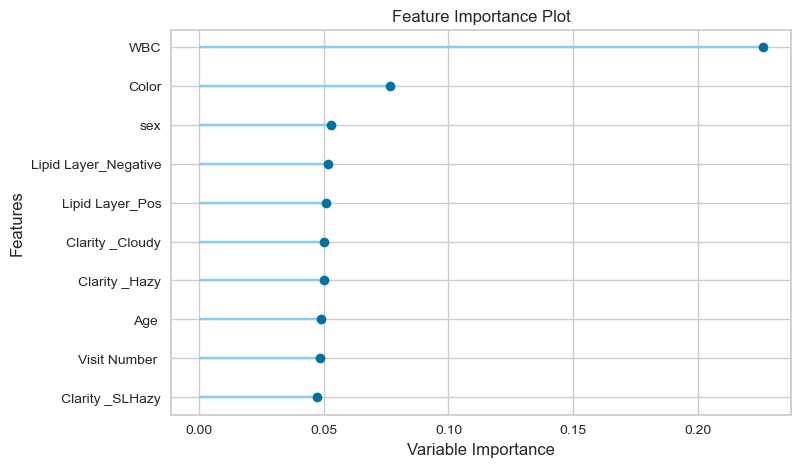

In [25]:
plot_model(tuned_et3, plot = 'feature')

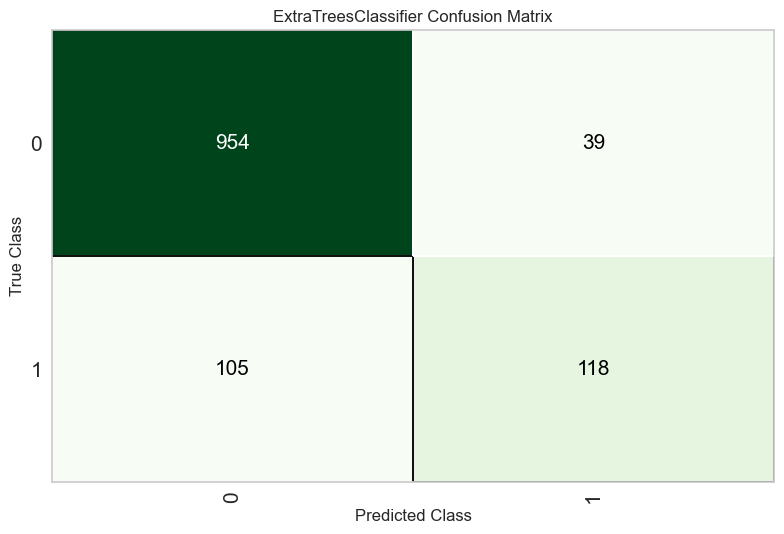

In [26]:
plot_model(tuned_et3 , plot = 'confusion_matrix')

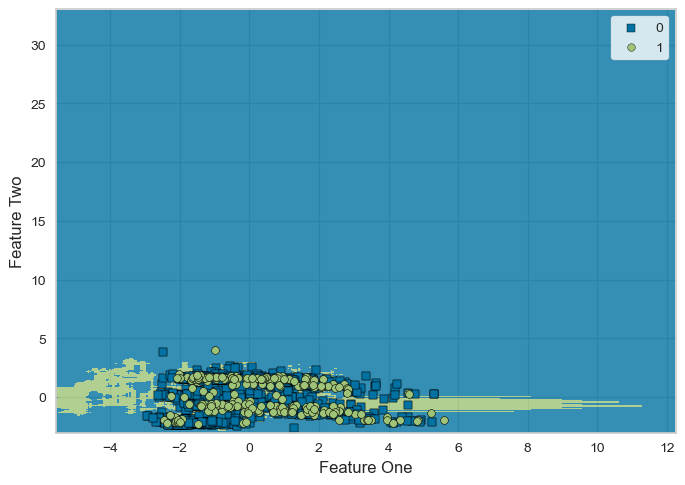

In [27]:
plot_model(tuned_et3 , plot = 'boundary', use_train_data = True)

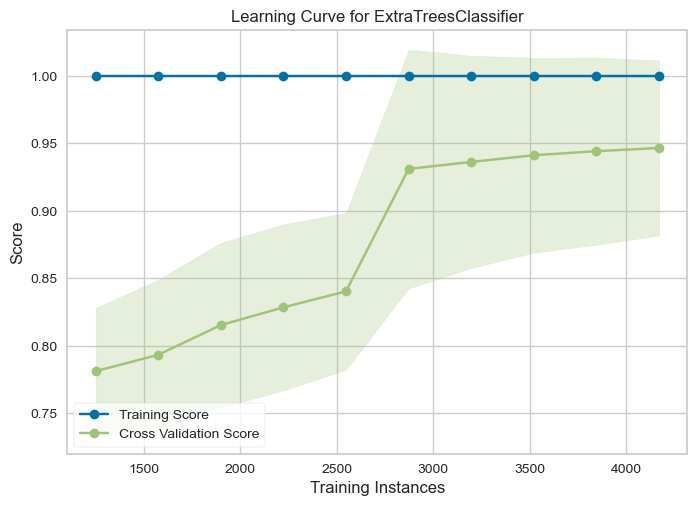

In [28]:
plot_model(tuned_et3, plot = 'learning', use_train_data = True)